## Standard Boilerplate to Intialize Notebook
The cell below contains the code needed to import the database connector and start using data. Note that, to use the database connector with the `local` methods, you'll need to have a local instance of the application installed, loaded, and running (`flask run`). See [GitHub](https://github.com/tjmisko/sspi-data-webapp/blob/main/README.md) for more information on installation.

In [1]:
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from sys import path
path.append('../')
from database_connector.SSPIDatabaseConnector import SSPIDatabaseConnector
sspi = SSPIDatabaseConnector()
main_data_json = sspi.get_data_local("/api/v1/query/sspi_main_data_v3").json()

------------------------------------------------------------------
ModuleNotFoundError              Traceback (most recent call last)
Cell In[2], line 1
----> 1 import networkx as nx
      2 import pandas as pd
      3 import math

ModuleNotFoundError: No module named 'networkx'


## Filtering the Data
We load the data into a pandas Dataframe by passing the processed JSON in `main_data_json`, and we run a `query` on the column `IndicatorCode` to select out only those observations which measure Air Pollution (`AIRPOL`). We also sort the dataframe by `Value`, which will facilitate our plotting in the next section.

In [ ]:
main_data_frame = pd.DataFrame(main_data_json)
airpol_data = main_data_frame.query('IndicatorCode=="AIRPOL"')
airpol_data = airpol_data.sort_values('Value', ascending=False)

## Generate Plots with MatPlotLib

The cells below provide good examples of how to use matplotlib to create sophisticated, multilayered plots to communicate your findings visually. 

I find that the easiest way to get familiar with the capabilities of the library is through ChatGPT/GenAI. Tell it in plain words what you want, and see what it produces, then fiddle around from there.

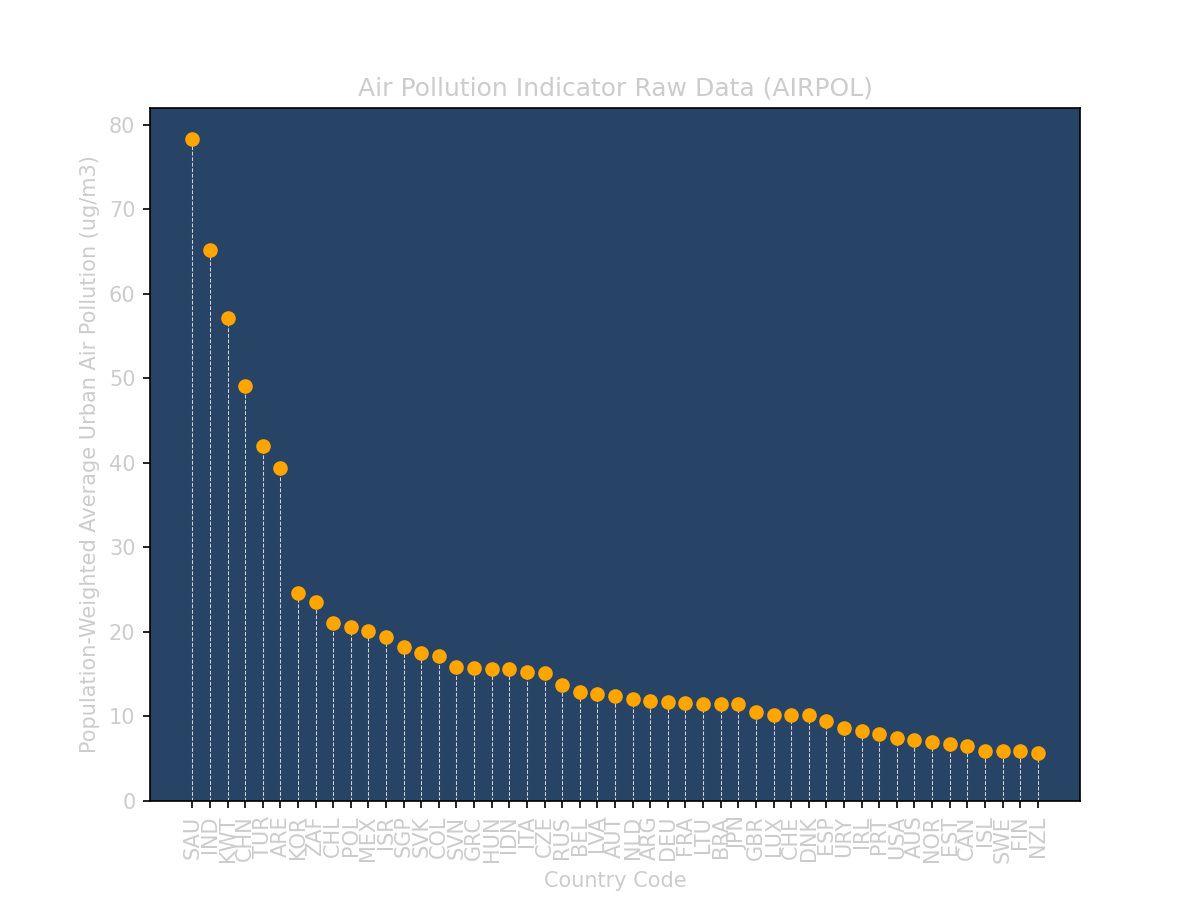

In [2]:
# Example data for scatter plot

# Create scatter plot
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_facecolor('white')  # Set color to white (or any other color)
fig.patch.set_alpha(0.0)  # Set transparency (0 is fully transparent)
ax.set_facecolor('#274366')

# Add dashed vertical lines at each x-tick
for xi, yi in zip(list(range(49)), list(airpol_data["Value"])):
    ax.axvline(x=xi, ymin=0, ymax=yi/82, color='lightgray', linestyle='--', linewidth=0.5, zorder=-1)
ax.scatter(list(range(49)), airpol_data["Value"], color="orange")
ax.set_ylim(0, 82)
# Adding labels and title
ax.set_title('Air Pollution Indicator Raw Data (AIRPOL)', color="#ccc")
ax.set_xlabel('Country Code', color="#ccc")
ax.set_ylabel('Population-Weighted Average Urban Air Pollution (ug/m3)', color="#ccc")

ax.set_xticks(ticks=list(range(49)), labels=list(airpol_data["CountryCode"]), rotation=90, color="#ccc")
ax.set_yticks(ticks=[x*10 for x in range(9)], labels=[x*10 for x in range(9)], color="#ccc")

# Display the plot
fig.savefig("airpol_raw.png", dpi=300)

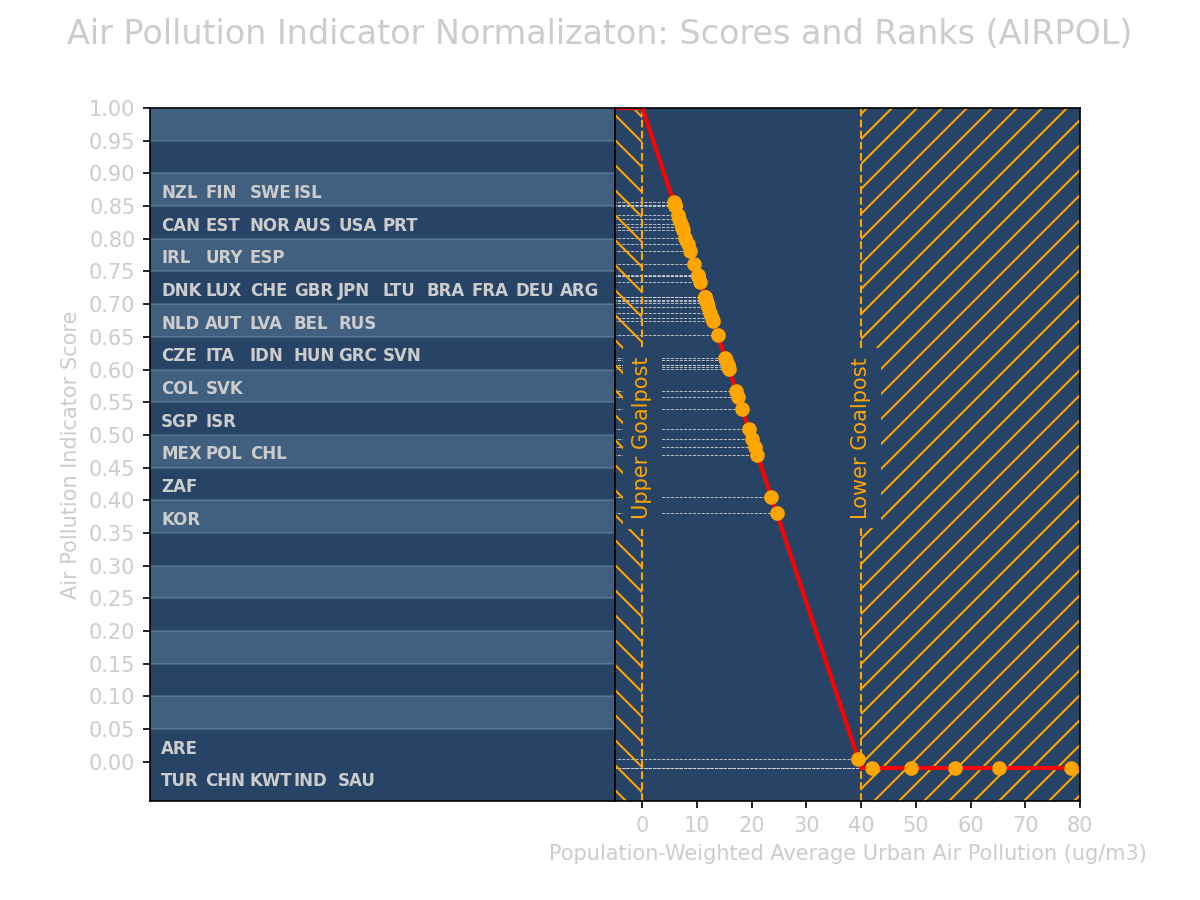

In [3]:
# Example data for scatter plot
score_buckets = [x/20 for x in range(20)]
airpol_data["ScoreTier"] = airpol_data.apply(lambda row: math.ceil(row["Score"]*20), axis=1)
airpol_data["TierRank"] = airpol_data.groupby("ScoreTier")["Value"].rank(ascending=True, method="first")

# Create scatter plot
# plt.figure(figsize=(8,5))
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(8,6), gridspec_kw={'wspace': 0})
fig.patch.set_facecolor('white')  # Set color to white (or any other color)
fig.patch.set_alpha(0.0)  # Set transparency (0 is fully transparent)
ax1.set_facecolor('#274366')

# Add dashed vertical lines for upper and lower goalposts
ax1.axvline(x=0, color='orange', linestyle='--', linewidth=1, zorder=-1)
ax1.axvline(x=40, color='orange', linestyle='--', linewidth=1, zorder=-1)
ax1.text(0, 0.5, 'Upper Goalpost', color='orange', 
         ha='center', va='center', backgroundcolor='#274366', rotation=90)
ax1.text(40, 0.5, 'Lower Goalpost', color='orange', 
         ha='center', va='center', backgroundcolor='#274366', rotation=90)
ax1.axvspan(40, 80, 
            facecolor='none', edgecolor='orange', hatch='//', linestyle='-', linewidth=0)
ax1.axvspan(-5, 0, 
            facecolor='none', edgecolor='orange', hatch=r'\\', linestyle='-', linewidth=0)
ax1.plot([-5, 0, 40, 80], [1, 1, 0, 0], color="red", linestyle='-', linewidth=2, zorder=1)

ax1.set_ylim(-0.05, 1.0)
ax1.yaxis.set_visible(False)
ax1.set_xlim(-5, 80)
ax1.set_xticks(ticks=[x*10 for x in range(9)], labels=[x*10 for x in range(9)], color="#ccc")

for xi, yi in zip(list(airpol_data["Value"]), list(airpol_data["Score"])):
    ax1.axhline(xmin=-5, xmax=(xi+5)/85, y=yi, color='lightgrey', linestyle='--', linewidth=0.4, zorder=-5)
ax1.scatter(airpol_data["Value"], airpol_data["Score"], linewidth=1, zorder=2, color="orange")

# Adding labels and title
fig.suptitle('Air Pollution Indicator Normalizaton: Scores and Ranks (AIRPOL)', color="#ccc", fontsize=16)
ax1.set_xlabel('Population-Weighted Average Urban Air Pollution (ug/m3)', color="#ccc")

# ax2.set_facecolor('#274366')

for i in range(10):
    ax2.axhspan(2*i+1, 2*i+2, color='lightblue', alpha=0.2)
ax2.set_ylabel('Air Pollution Indicator Score', color="#ccc")
ax2.set_facecolor('#274366')

for i in range(49):
    ax2.text(list(airpol_data["TierRank"])[i]-0.5, list(airpol_data["ScoreTier"])[i]-0.75, list(airpol_data["CountryCode"])[i], fontsize=8, color="#ccc", fontweight='bold')
ax2.set_xlim(0.25,10.75)
ax2.set_ylim(-1.2,20)
ax2.xaxis.set_visible(False)
ax2.set_yticks(list(range(21)), [f"{x/20:.2f}" for x in range(21)], color="#ccc")

# Adding labels and title
# ax2.set_title('Air Pollution Indicator Score Tiers (AIRPOL)')
# ax2.set_xlabel('Population-Weighted Average Urban Air Pollution (ug/m3)')
ax2.set_ylabel('Air Pollution Indicator Score')
# Display the plot
fig.savefig("airpol_goalposting.png", dpi=300)

## Score Buckets

The idea of this plot is to show something akin to a histogram of policy scores for the Air Quality.

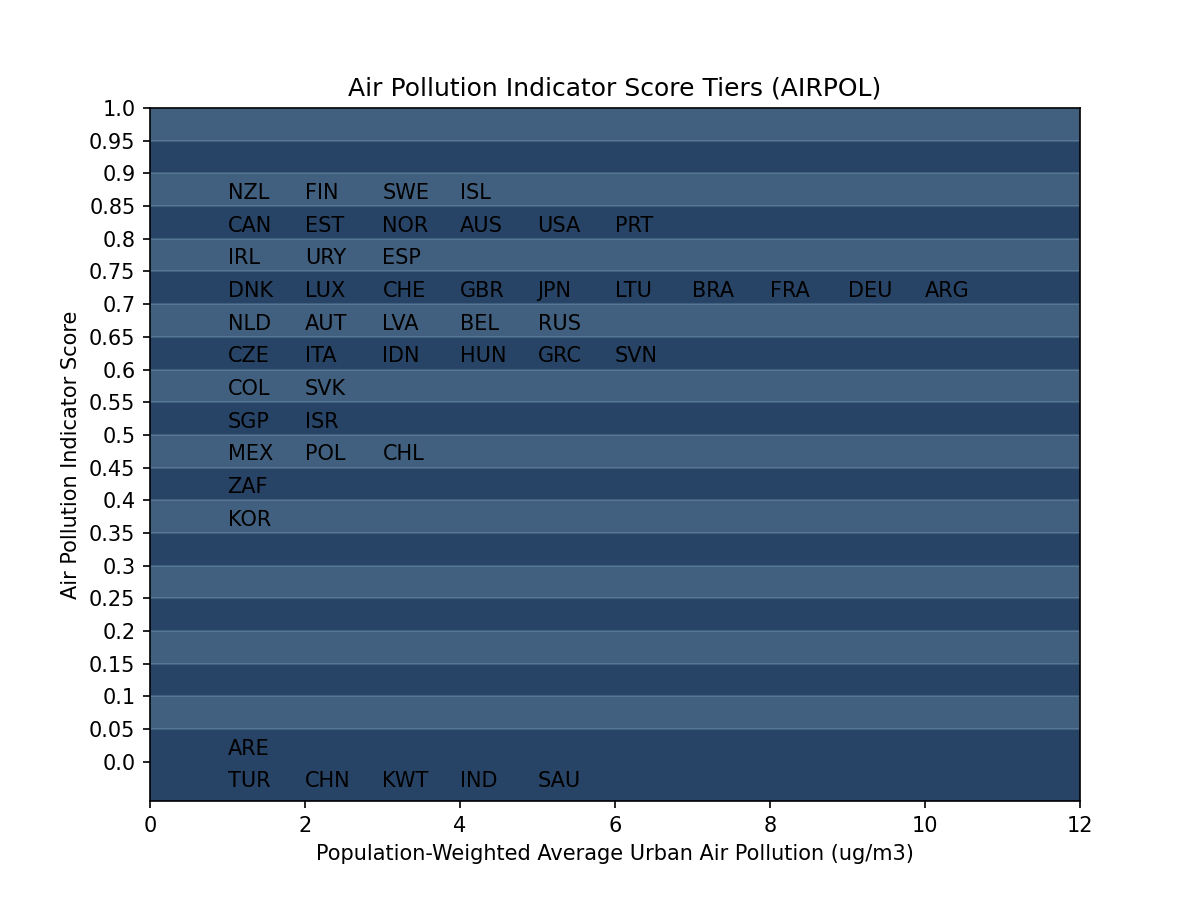

In [4]:
score_buckets = [x/20 for x in range(20)]
airpol_data["ScoreTier"] = airpol_data.apply(lambda row: math.ceil(row["Score"]*20), axis=1)
airpol_data["TierRank"] = airpol_data.groupby("ScoreTier")["Value"].rank(ascending=True, method="first")

# plt.figure(figsize=(8,5))
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_facecolor('white')  # Set color to white (or any other color)
fig.patch.set_alpha(0.0)  # Set transparency (0 is fully transparent)
ax.set_facecolor('#274366')

# Add dashed vertical lines for upper and lower goalposts
for i in range(49):
    ax.text(list(airpol_data["TierRank"])[i], list(airpol_data["ScoreTier"])[i]-0.78, list(airpol_data["CountryCode"])[i])
ax.set_xlim(0,12)
ax.set_ylim(-1.2,20)
ax.set_yticks(list(range(21)), [str(x/20) for x in range(21)])

# Adding labels and title
ax.set_title('Air Pollution Indicator Score Tiers (AIRPOL)')
ax.set_xlabel('Population-Weighted Average Urban Air Pollution (ug/m3)')
ax.set_ylabel('Air Pollution Indicator Score')

for i in range(10):
    ax.axhspan(2*i+1, 2*i+2, color='lightblue', alpha=0.2)
# Annotate each point with its label
#for i in range(49):
 # plt.text(i+1, list(airpol_data["Value"])[i]+1, list(airpol_data["CountryCode"])[i], fontsize=8, ha='right')

# Display the plot
fig.savefig("airpol_log.png", dpi=300)

## Should we consider using logs?

When would it make sense to score countries using logs of data instead of the data itself?

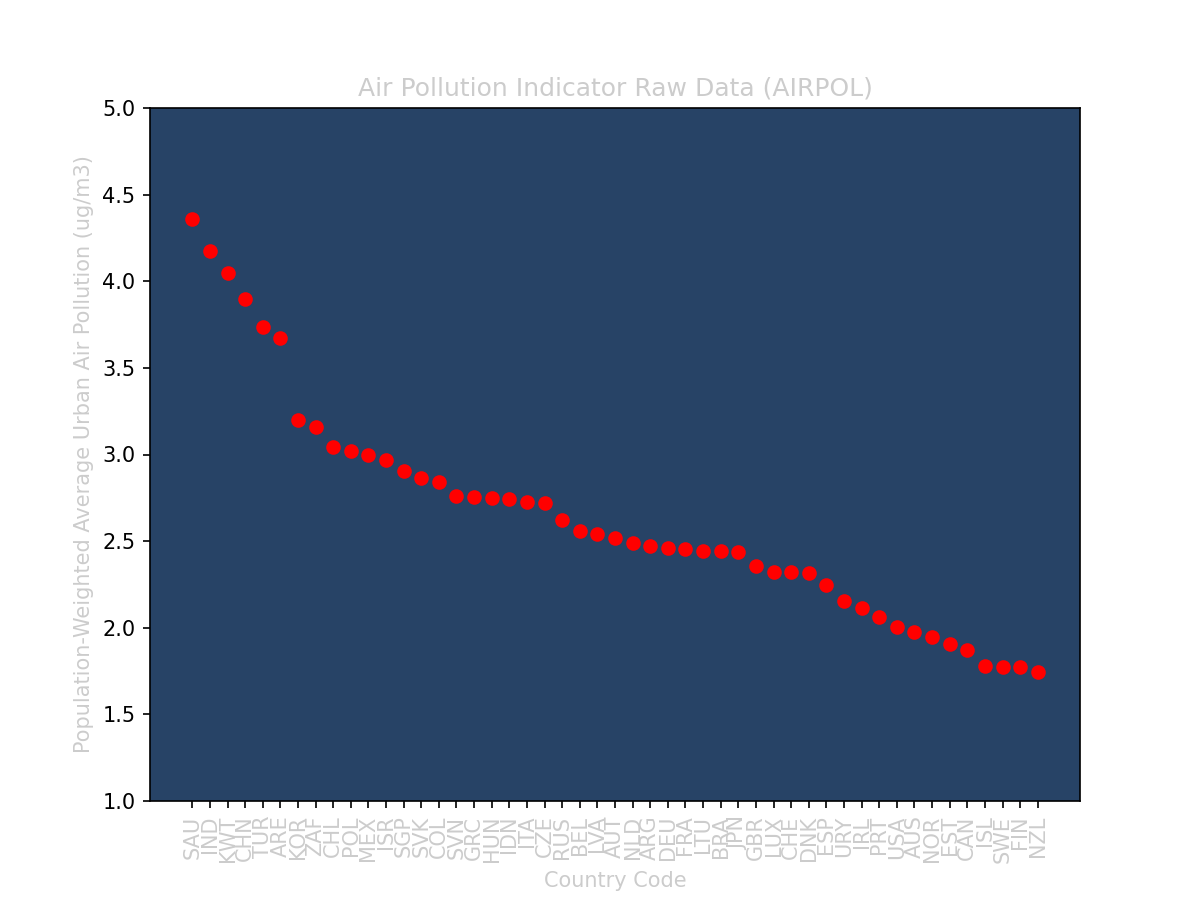

In [5]:
# Example data for scatter plot
airpol_data["LogValue"] = airpol_data.apply(lambda row: math.log(row["Value"]), axis=1)
# Create scatter plot
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_facecolor('white')  # Set color to white (or any other color)
fig.patch.set_alpha(0.0)  # Set transparency (0 is fully transparent)
ax.set_facecolor('#274366')

# Add dashed vertical lines at each x-tick
# for xi, yi in zip(list(range(49)), list(airpol_data["Value"])):
#     ax.axvline(x=xi, ymin=0, ymax=yi/82, color='lightgray', linestyle='--', linewidth=0.5, zorder=-1)
# ax.scatter(list(range(49)), airpol_data["Value"], color="orange")
ax.scatter(list(range(49)), airpol_data["LogValue"], color="red")
ax.set_ylim(1, 5)
# Adding labels and title
ax.set_title('Air Pollution Indicator Raw Data (AIRPOL)', color="#ccc")
ax.set_xlabel('Country Code', color="#ccc")
ax.set_ylabel('Population-Weighted Average Urban Air Pollution (ug/m3)', color="#ccc")

ax.set_xticks(ticks=list(range(49)), labels=list(airpol_data["CountryCode"]), rotation=90, color="#ccc")
# ax.set_yticks(ticks=[x*10 for x in range(9)], labels=[x*10 for x in range(9)], color="#ccc")

# Display the plot
fig.savefig("airpol_log.png", dpi=300)